## Installing Required Packages for PDF Table Extraction (tabula-py) and Plotting

In [1]:
%%capture
%pip install tabula-py
%pip install tueplots

## Importing Required Libraries for Data Analysis and Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from tueplots import bundles
from tueplots.constants.color import rgb
import math
import scipy.stats

# Reading and storing the dataset

In [3]:
# reading all cases between 2002 and 2013
cases = []
cases_col_names = ['Key', 'Offence', 'Recorded Cases', 'Recorded Cases Previous Year', 'Change in number', 'Change in %', 'CR% This Year']

for i in range(2,14):
  if(i<10):
    cases_in_this_year = pd.read_excel(f'Cases200{i}.xlsx', skiprows=0)
  else:
    cases_in_this_year = pd.read_excel(f'Cases20{i}.xlsx', skiprows=0)
  for j in range(len(cases_col_names)):
    cases_in_this_year.columns.array[j] = cases_col_names[j]
  to_drop = []
  i = 0
  for ind in cases_in_this_year.index:
    if cases_in_this_year['Key'].isnull()[i] == True:
        to_drop.append(i)
    i += 1
  cases_in_this_year = cases_in_this_year.drop(index=to_drop, axis=0)
  cases_in_this_year = cases_in_this_year.reset_index()
  cases_in_this_year = cases_in_this_year.drop(columns=['index'])

  cases.append(cases_in_this_year)

In [4]:
#reading all cases, suspects, victims, and developement files between 2014 and 2022
suspects = []
victims = []
developments = []

cases_col_names = ['Key', 'Offence', 'Recorded Cases', 'Percentage of All Cases', 'Attempts', 'Attempts in %', 'Inhabitants < 20k', '20k < Inhabitants < 100k', '100k < Inhabitants < 500k',
             'Inhabitants > 500k', 'Number of Inhabitants Unknown', 'Threatened with Firearm', 'Shot', 'Clearance', 'Clearance in %', 'Number of Suspects Recorded', 'Male Suspects',
             'Female Suspects', 'Number of Non-German Suspects', 'Non-German Suspects in %']
suspects_col_names = ['Key', 'Offence', 'Sex', 'Number of Suspects', 'Age < 6', '6 < Age < 8', '8 < Age < 10', '10 < Age < 12', '12 < Age < 14',
             'Age < 14', '14 < Age < 16', '16 < Age < 18', '14 < Age < 18', '18 < Age < 21', 'Age < 21', '21 < Age < 23', '23 < Age < 25',
             '21 < Age < 25', '25 < Age < 30', '30 < Age < 40', '40 < Age < 50', '50 < Age < 60', '60 < Age', '21 < Age']
victims_col_names = ['Key', 'Offence', 'Case status', 'Total', 'Male', 'Female', 'Total Age < 6', 'Male Age < 6', 'Female Age < 6',
                     'Total 6 < Age < 14', 'Male 6 < Age < 14', 'Female 6 < Age < 14', 'Total Age < 14', 'Male Age < 14', 'Female Age < 14',
                     'Total 14 < Age < 18', 'Male 14 < Age < 18', 'Female 14 < Age < 18', 'Total 18 < Age < 21', 'Male 18 < Age < 21', 'Female 18 < Age < 21',
                     'Total 21 < Age < 60', 'Male 21 < Age < 60', 'Female 21 < Age < 60', 'Total 60 < Age', 'Male 60 < Age', 'Female 60 < Age',
                     'Total 21 < Age', 'Male 21 < Age', 'Female 21 < Age']
developments_col_names = ['Change', 'Key', 'Offence', 'Recorded cases this year', 'Recorded cases previous year', 'Change number', 'Change in %', 'CR% this year', 'CR% previous year']

for i in range(14,23):
  cases_in_this_year = pd.read_excel(f'pks20{i}CasesBasicTable_excel.xlsx', skiprows=7)
  suspects_in_this_year = pd.read_excel(f'pks20{i}Suspects_excel.xlsx', skiprows=8)
  victims_in_this_year = pd.read_excel(f'pks20{i}Victims_excel.xlsx', skiprows=6)
  #developments_in_this_year = pd.read_excel(f'pks20{i}CasesDevelopment_excel.xlsx', skiprows=17)

  #cases_in_this_year = cases_in_this_year.drop(cases_in_this_year.columns[0], axis=1)
  #suspects_in_this_year = suspects_in_this_year.drop(suspects_in_this_year.columns[0], axis=1)
  #victims_in_this_year = victims_in_this_year.drop(victims_in_this_year.columns[0], axis=1)

  for j in range(len(cases_col_names)):
    cases_in_this_year.columns.array[j] = cases_col_names[j]
  for j in range(len(suspects_col_names)):
    suspects_in_this_year.columns.array[j] = suspects_col_names[j]
  for j in range(len(victims_col_names)):
    victims_in_this_year.columns.array[j] = victims_col_names[j]
  #for j in range(len(developments_col_names)):
   # developments_in_this_year.columns.array[j] = developments_col_names[j]

  cases.append(cases_in_this_year)
  suspects.append(suspects_in_this_year)
  victims.append(victims_in_this_year)
  #developments.append(developments_in_this_year)

In [5]:
# Convert lists to DataFrames

cases_df = []
for case_data in cases:
  case_df = pd.DataFrame(case_data)
  cases_df.append(case_df)

suspects_df = []
for suspect_yearly_data in suspects:
  suspects_one_year_df = pd.DataFrame(suspect_yearly_data)
  suspects_df.append(suspects_one_year_df)

victims_df = []
for victims_yearly_data in victims:
  victims_one_year_df = pd.DataFrame(victims_yearly_data)
  victims_df.append(victims_yearly_data)

First Let's look at the the total number of cases and clearance rates over the years.

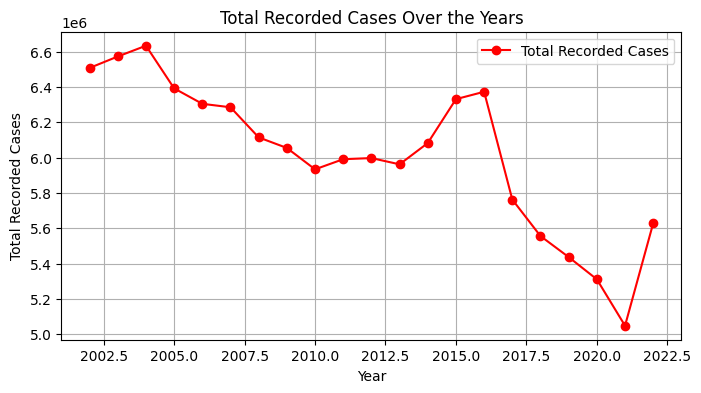

In [6]:
# Extracting total recorded cases for the respective years
total_recorded_cases = []

for year_df in cases:
    # Extracting total recorded cases
    total_cases = year_df.loc[0, 'Recorded Cases']
    total_recorded_cases.append(total_cases)

# Plotting total recorded cases
plt.figure(figsize=(8, 4))
plt.plot(range(2002, 2023), total_recorded_cases, marker='o', color='r', label='Total Recorded Cases')
plt.title('Total Recorded Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Recorded Cases')
plt.legend()
plt.grid(True)
plt.show()

Now we calculate some basic statistics

In [7]:
mean_cases = np.mean(total_recorded_cases)
median_cases = np.median(total_recorded_cases)
std_dev_cases = np.std(total_recorded_cases)

print(f"Mean: {mean_cases}")
print(f"Median: {median_cases}")
print(f"Standard Deviation: {std_dev_cases}")

Mean: 6012886.19047619
Median: 6054330.0
Standard Deviation: 418481.69606938196


From the visualisation the time series is not stationary, but we will do the stationarity check by the Augmented Dickey-Fuller test.

In [8]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(total_recorded_cases)

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.2299078554075056
p-value: 0.19557021600081675
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


p-value (0.1956) is greater than the common significance level of 0.05.
The results suggest that we do not have enough evidence to reject the null hypothesis of non-stationarity. The time series might be non-stationary.

Given this result, we apply differencing to make the time series stationary and then proceed with ARIMA modeling.

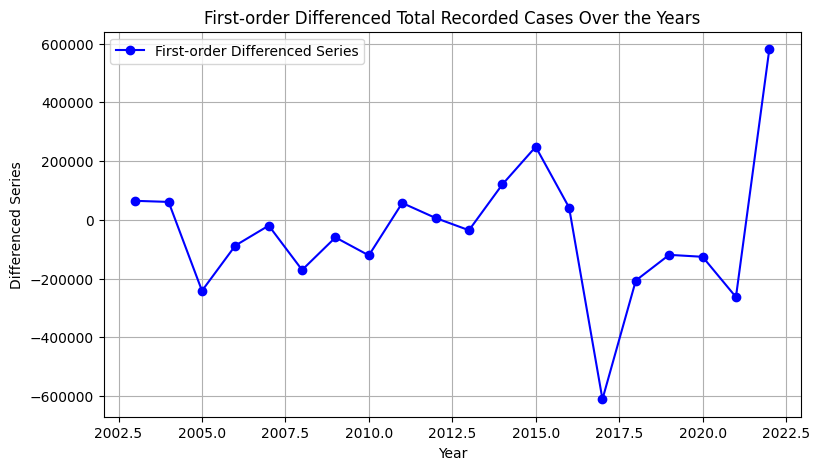

ADF Statistic (Differenced): -3.5870890699067814
p-value (Differenced): 0.006012708692611008
Critical Values (Differenced): {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}


In [9]:
# Apply first-order differencing
differenced_series = np.diff(total_recorded_cases)

# Plot the differenced series
plt.figure(figsize=(9, 5))
plt.plot(range(2003, 2023), differenced_series, marker='o', color='b', label='First-order Differenced Series')
plt.title('First-order Differenced Total Recorded Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Differenced Series')
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(differenced_series)

# Print the results for the differenced series
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

The reduced p-value indicates that after differencing, there is evidence to reject the null hypothesis of non-stationarity.

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):

ACF Plot: Look for significant spikes at different lags. Significant spikes beyond the confidence interval suggest potential autoregressive (AR) terms.

PACF Plot: Look for significant spikes at different lags. Significant spikes beyond the confidence interval suggest potential moving average (MA) terms.

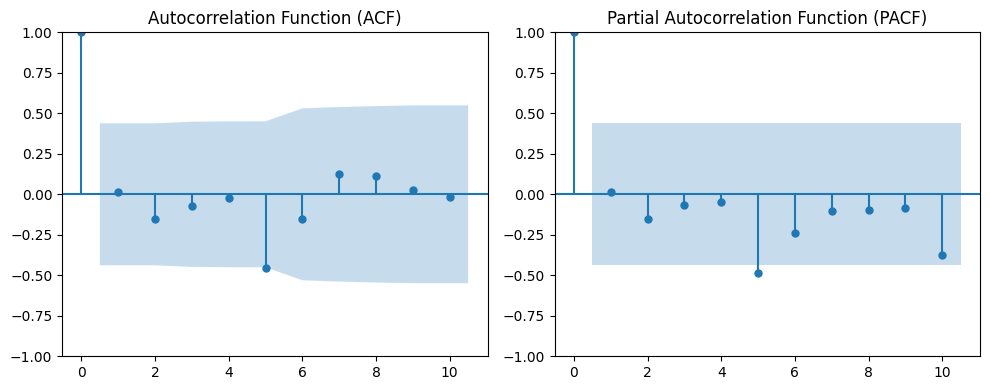

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
plt.figure(figsize=(10, 4))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(differenced_series, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(differenced_series, ax=plt.gca(), method='ywmle')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA


p_values = range(10)
d_values = [1]  # Differencing is applied, so set d to 1
q_values = range(10)

best_aic = float("inf")
best_order = None

# Iterate over possible model orders
for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # Use differenced series, so set d to 1
        try:
            # Fit ARIMA model
            model = ARIMA(total_recorded_cases, order=order)
            results = model.fit()

            # Update best order if AIC is lower
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order

        except Exception as e:
            # Handle any potential errors during fitting
            print(f"Error fitting model {order}: {str(e)}")

# Print the best model order
print(f"Best Model Order (AIC): {best_order} with AIC={best_aic}")

# Fit the best model on the differenced series
best_model = ARIMA(total_recorded_cases, order=best_order)
best_results = best_model.fit()

# Display best model summary
print(best_results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/lo

Error fitting model (8, 1, 4): LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error fitting model (8, 1, 7): LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best Model Order (AIC): (5, 1, 0) with AIC=12.0
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:                 ARIMA(5, 1, 0)   Log Likelihood                   0.000
Date:                Thu, 25 Jan 2024   AIC                             12.000
Time:                        17:57:06   BIC                             17.974
Sample:                             0   HQIC                            13.166
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8472         -0       -inf      0.000       0.847       0.847
ar.L2          1.8459   8.52e-08   2.17e+07      0.000       1.846       1.846
ar.L

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


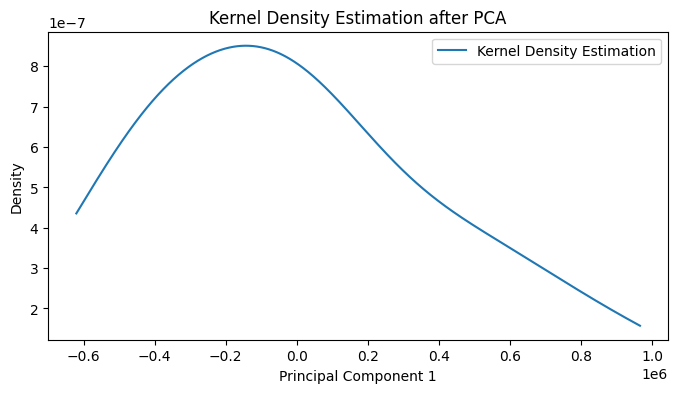

In [12]:
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

# Convert the list to a NumPy array
data = np.array(total_recorded_cases).reshape(-1, 1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data)

# Apply gaussian_kde on the transformed data
kde = gaussian_kde(data_pca[:, 0])

# Generate data points for plotting
x = np.linspace(data_pca.min(), data_pca.max(), 1000)
y = kde(x)

# Plot the KDE
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Kernel Density Estimation')
plt.title('Kernel Density Estimation after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Density')
plt.legend()
plt.show()

In [25]:
train_size = int(len(total_recorded_cases) * 0.8)  # 80% for training
train, test = total_recorded_cases[:train_size], total_recorded_cases[train_size:]

model_pca = ARIMA(data_pca[:train_size], order=(5, 1, 0))
results_pca = model_pca.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [26]:
# Make predictions using the ARIMA model
predictions_pca = results_pca.predict(start=train_size, end=train_size + len(test) - 1, typ='levels')

# Inverse transform the predictions to the original scale
predictions_original = pca.inverse_transform(predictions_pca.reshape(-1, 1)).flatten()

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - predictions_original) / test)) * 100

print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 7.36%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


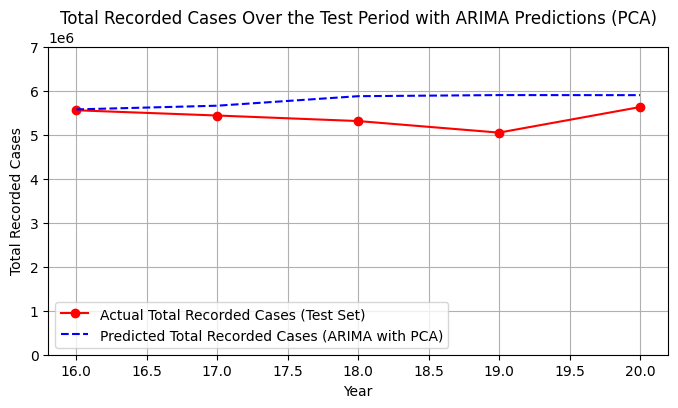

In [27]:
# Plotting the actual time series and predicted values
plt.figure(figsize=(8, 4))
plt.plot(range(train_size, len(total_recorded_cases)), test, marker='o', color='r', label='Actual Total Recorded Cases (Test Set)')
plt.plot(range(train_size, len(total_recorded_cases)), predictions_original, linestyle='--', color='b', label='Predicted Total Recorded Cases (ARIMA with PCA)')
plt.title('Total Recorded Cases Over the Test Period with ARIMA Predictions (PCA)')
plt.xlabel('Year')
plt.ylabel('Total Recorded Cases')
plt.ylim(0, 7000000)
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


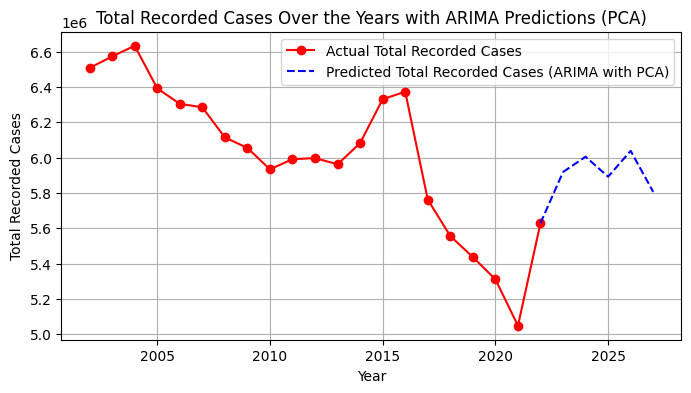

In [30]:
# Fit an ARIMA model to the transformed data
model_prediction = ARIMA(data_pca, order=(5, 1, 0))
results = model_prediction.fit()

forecast_period = 5
# Make predictions using the ARIMA model
predictions = results.predict(start=len(data_pca), end=len(data_pca) + forecast_period - 1, typ='levels')

# Inverse transform the predictions to the original space
predictions_original = pca.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Plotting the original time series and predictions
plt.figure(figsize=(8, 4))
plt.plot(range(2002, 2023), total_recorded_cases, marker='o', color='r', label='Actual Total Recorded Cases')

# Extend the x-axis range to include the predicted period
x_range_extended = range(2002, 2023 + forecast_period)

# Plot a line connecting the last data point in 2022 to the first predicted point in 2023
plt.plot([2022, 2023], [total_recorded_cases[-1], predictions_original[0]], linestyle='--', color='b')

# Plot the rest of the predicted values
plt.plot(x_range_extended[-forecast_period:], predictions_original, linestyle='--', color='b', label='Predicted Total Recorded Cases (ARIMA with PCA)')

plt.title('Total Recorded Cases Over the Years with ARIMA Predictions (PCA)')
plt.xlabel('Year')
plt.ylabel('Total Recorded Cases')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
years = [2023, 2024, 2025, 2026, 2027]

# Printing predictions with the corresponding year names
for year, prediction in zip(years, predictions_original):
    print(f"Year {year}: {prediction} total crimes")

Year 2023: 5918202.51442824 total crimes
Year 2024: 6004778.54764209 total crimes
Year 2025: 5891585.39831222 total crimes
Year 2026: 6037829.073395248 total crimes
Year 2027: 5805529.72018479 total crimes
